<a href="https://colab.research.google.com/github/lefreakcestchic1971/coviditaly/blob/master/CovidItaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-white')
root = "/content/drive/My Drive/Colab Notebooks/"
datadir = root + "Dataset/"



Costruiamo e visualizziamo un subset del dataset pubblicato dalla Protezione Civile al seguente [link](https://github.com/pcm-dpc/COVID-19/tree/master/dati-regioni) ed aggiornato quotidianamente

In [27]:
covid = pd.read_csv(datadir + "20200329.csv", sep=",", parse_dates=True)
covid = covid.rename(columns={'data': 'date'})
covid = covid[['date', 'denominazione_regione', 'totale_attualmente_positivi', 'dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi']]
covid

date denominazione_regione  ...  totale_casi  tamponi
0    2020-02-24T18:00:00               Abruzzo  ...            0        5
1    2020-02-24T18:00:00            Basilicata  ...            0        0
2    2020-02-24T18:00:00          P.A. Bolzano  ...            0        1
3    2020-02-24T18:00:00              Calabria  ...            0        1
4    2020-02-24T18:00:00              Campania  ...            0       10
..                   ...                   ...  ...          ...      ...
730  2020-03-29T17:00:00               Toscana  ...         4122    27579
731  2020-03-29T17:00:00           P.A. Trento  ...         1594     5950
732  2020-03-29T17:00:00                Umbria  ...         1023     7685
733  2020-03-29T17:00:00         Valle d'Aosta  ...          584     1480
734  2020-03-29T17:00:00                Veneto  ...         8358    94784

[735 rows x 7 columns]

Riorganizziamo il dataframe per esplicitare il numero di positivi e di deceduti per regione e per giorno, nonchè la percentuale di deceduti tra coloro che sono risultati positivi

In [28]:
italy_currently_positive = covid.pivot_table('totale_attualmente_positivi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_currently_positive = italy_currently_positive.fillna(method='ffill')
italy_currently_positive = italy_currently_positive.fillna(0)
italy_currently_positive = italy_currently_positive.iloc[:-1] #remove last row (Italia). If i wanted to remove last column I should do iloc[:, :-1]
italy_currently_positive.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_dead = covid.pivot_table('deceduti', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_dead = italy_dead.fillna(method='ffill')
italy_dead = italy_dead.fillna(0)
italy_dead = italy_dead.iloc[:-1] 
italy_dead.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_total_positive = covid.pivot_table('totale_casi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_total_positive = italy_total_positive.fillna(method='ffill')
italy_total_positive = italy_total_positive.fillna(0)
italy_total_positive = italy_total_positive.iloc[:-1] 
italy_total_positive.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_tested = covid.pivot_table('tamponi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_tested = italy_tested.fillna(method='ffill')
italy_tested = italy_tested.fillna(0)
italy_tested = italy_tested.iloc[:-1] 
italy_tested.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_dead_vs_total = italy_dead/italy_total_positive
italy_dead_vs_total = italy_dead_vs_total.fillna(0)
italy_currently_positive

denominazione_regione  Abruzzo  Basilicata  ...  Veneto  Italia
date                                        ...                
2020-02-24T18:00:00          0           0  ...      32     221
2020-02-25T18:00:00          0           0  ...      42     311
2020-02-26T18:00:00          0           0  ...      69     385
2020-02-27T18:00:00          1           0  ...     109     588
2020-02-28T18:00:00          1           0  ...     149     821
2020-02-29T17:00:00          2           0  ...     189    1049
2020-03-01T17:00:00          5           0  ...     261    1577
2020-03-02T18:00:00          5           0  ...     271    1835
2020-03-03T18:00:00          6           1  ...     297    2263
2020-03-04T17:00:00          7           1  ...     345    2706
2020-03-05T17:00:00          8           1  ...     380    3296
2020-03-06T17:00:00          9           3  ...     454    3916
2020-03-07T18:00:00         11           3  ...     505    5061
2020-03-08T18:00:00         17           4  ...     623    6387
2020-03-09T18:00:00         30           5  ...     694    7985
2020-03-10T18:00:00         37           7  ...     783    8514
2020-03-11T17:00:00         37           8  ...     940   10590
2020-03-12T17:00:00         78           8  ...    1297   12839
2020-03-13T17:00:00         83          10  ...    1453   14955
2020-03-14T17:00:00        106          10  ...    1775   17750
2020-03-15T17:00:00        128          11  ...    1989   20603
2020-03-16T17:00:00        165          12  ...    2274   23073
2020-03-17T17:00:00        216          20  ...    2488   26062
2020-03-18T17:00:00        249          27  ...    2953   28710
2020-03-19T17:00:00        366          37  ...    3169   33190
2020-03-20T17:00:00        422          52  ...    3677   37860
2020-03-21T17:00:00        494          66  ...    4214   42681
2020-03-22T17:00:00        539          81  ...    4644   46638
2020-03-23T17:00:00        605          89  ...    4986   50418
2020-03-24T17:00:00        622          91  ...    5351   54030
2020-03-25T17:00:00        738         112  ...    5745   57521
2020-03-26T17:00:00        860         133  ...    6140   62013
2020-03-27T17:00:00        925         147  ...    6648   66414
2020-03-28T17:00:00       1027         178  ...    6913   70065
2020-03-29T17:00:00       1169         197  ...    7251   73880

[35 rows x 22 columns]

In [29]:
italy_dead

denominazione_regione  Abruzzo  Basilicata  ...  Veneto  Italia
date                                        ...                
2020-02-24T18:00:00          0           0  ...       1       7
2020-02-25T18:00:00          0           0  ...       1      10
2020-02-26T18:00:00          0           0  ...       2      12
2020-02-27T18:00:00          0           0  ...       2      17
2020-02-28T18:00:00          0           0  ...       2      21
2020-02-29T17:00:00          0           0  ...       2      29
2020-03-01T17:00:00          0           0  ...       2      34
2020-03-02T18:00:00          0           0  ...       2      52
2020-03-03T18:00:00          0           0  ...       3      79
2020-03-04T17:00:00          0           0  ...       6     107
2020-03-05T17:00:00          0           0  ...      10     148
2020-03-06T17:00:00          0           0  ...      12     197
2020-03-07T18:00:00          0           0  ...      13     233
2020-03-08T18:00:00          0           0  ...      18     366
2020-03-09T18:00:00          0           0  ...      20     463
2020-03-10T18:00:00          1           0  ...      26     631
2020-03-11T17:00:00          1           0  ...      29     827
2020-03-12T17:00:00          2           0  ...      32    1016
2020-03-13T17:00:00          2           0  ...      42    1266
2020-03-14T17:00:00          2           0  ...      55    1441
2020-03-15T17:00:00          3           0  ...      63    1809
2020-03-16T17:00:00          4           0  ...      69    2158
2020-03-17T17:00:00          6           0  ...      80    2503
2020-03-18T17:00:00          7           0  ...      94    2978
2020-03-19T17:00:00         11           0  ...     115    3405
2020-03-20T17:00:00         17           0  ...     131    4032
2020-03-21T17:00:00         22           0  ...     146    4825
2020-03-22T17:00:00         33           0  ...     169    5476
2020-03-23T17:00:00         38           1  ...     192    6077
2020-03-24T17:00:00         46           1  ...     216    6820
2020-03-25T17:00:00         52           1  ...     258    7503
2020-03-26T17:00:00         63           1  ...     287    8165
2020-03-27T17:00:00         68           3  ...     313    9134
2020-03-28T17:00:00         76           3  ...     362   10023
2020-03-29T17:00:00         88           4  ...     392   10779

[35 rows x 22 columns]

Passiamo ora alle rappresentazioni grafiche

Nella seguente grafica viene rappresentata la dinamica temporale dei positivi, regione per regione, evidenziando i deceduti con un colore più scuro

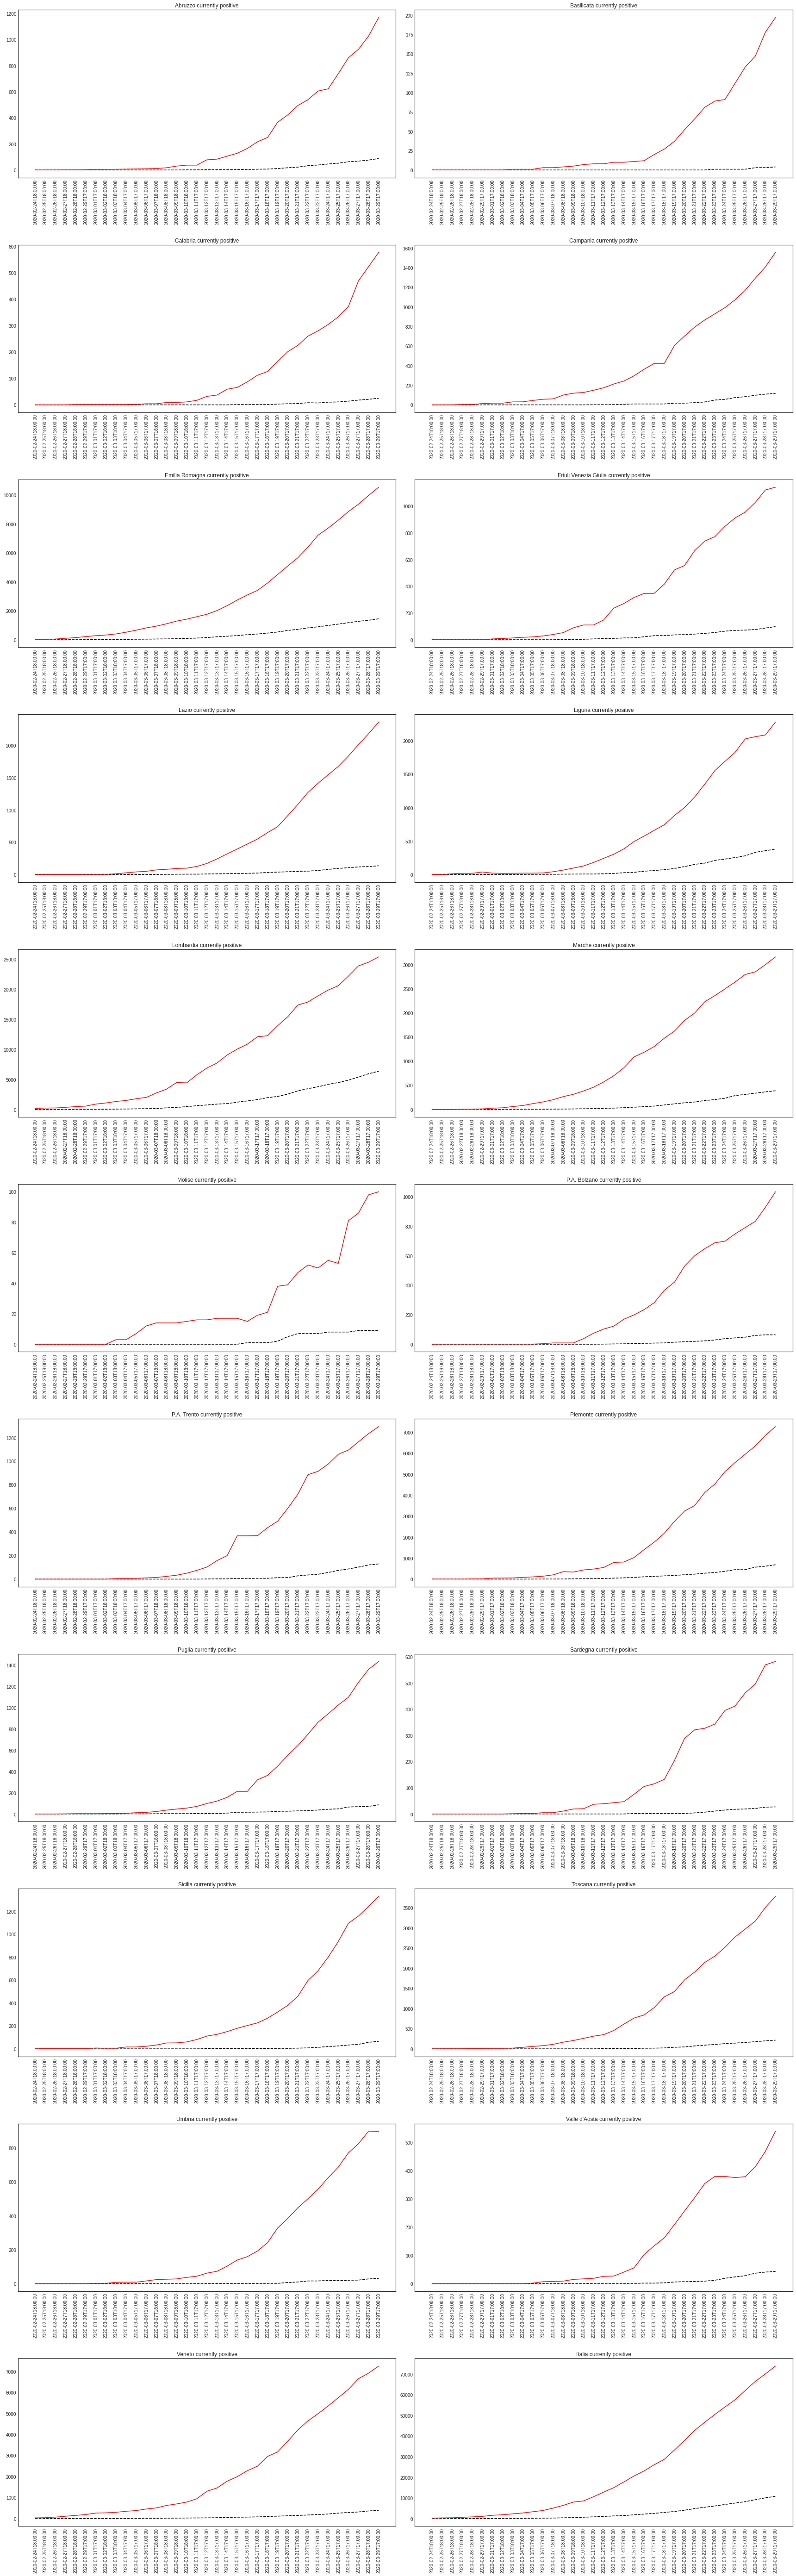

In [31]:
columns = list(italy_dead)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    #fig, ax = plt.subplots(2,3,i,figsize=(10, 5))
    ax = f.add_subplot(11, 2, i)
    region_positive = italy_currently_positive[[region]]
    region_positive.columns = ['Positive']
    region_dead = italy_dead[[region]]
    region_dead.columns = ['Dead']
    #plt.bar(region_dead.index, height=region_dead.Dead, label=region, alpha=0.3)
    #plt.bar(region_positive.index, height=region_positive.Positive, label=region, alpha=0.3)
    ax.plot(region_dead.index, region_dead.Dead, '--k')
    ax.plot(region_positive.index, region_positive['Positive'], '-r')
    ax.set_title(region + ' currently positive')
    ax.set_xticklabels(region_positive.index,rotation=90)
    i=i+1


I grafici indicano una crescita pressochè costante tranne in Umbria in cui sembra esserci stata una battuta d'arresto

Segue una comparazione tra regioni relativa al numero di positivi

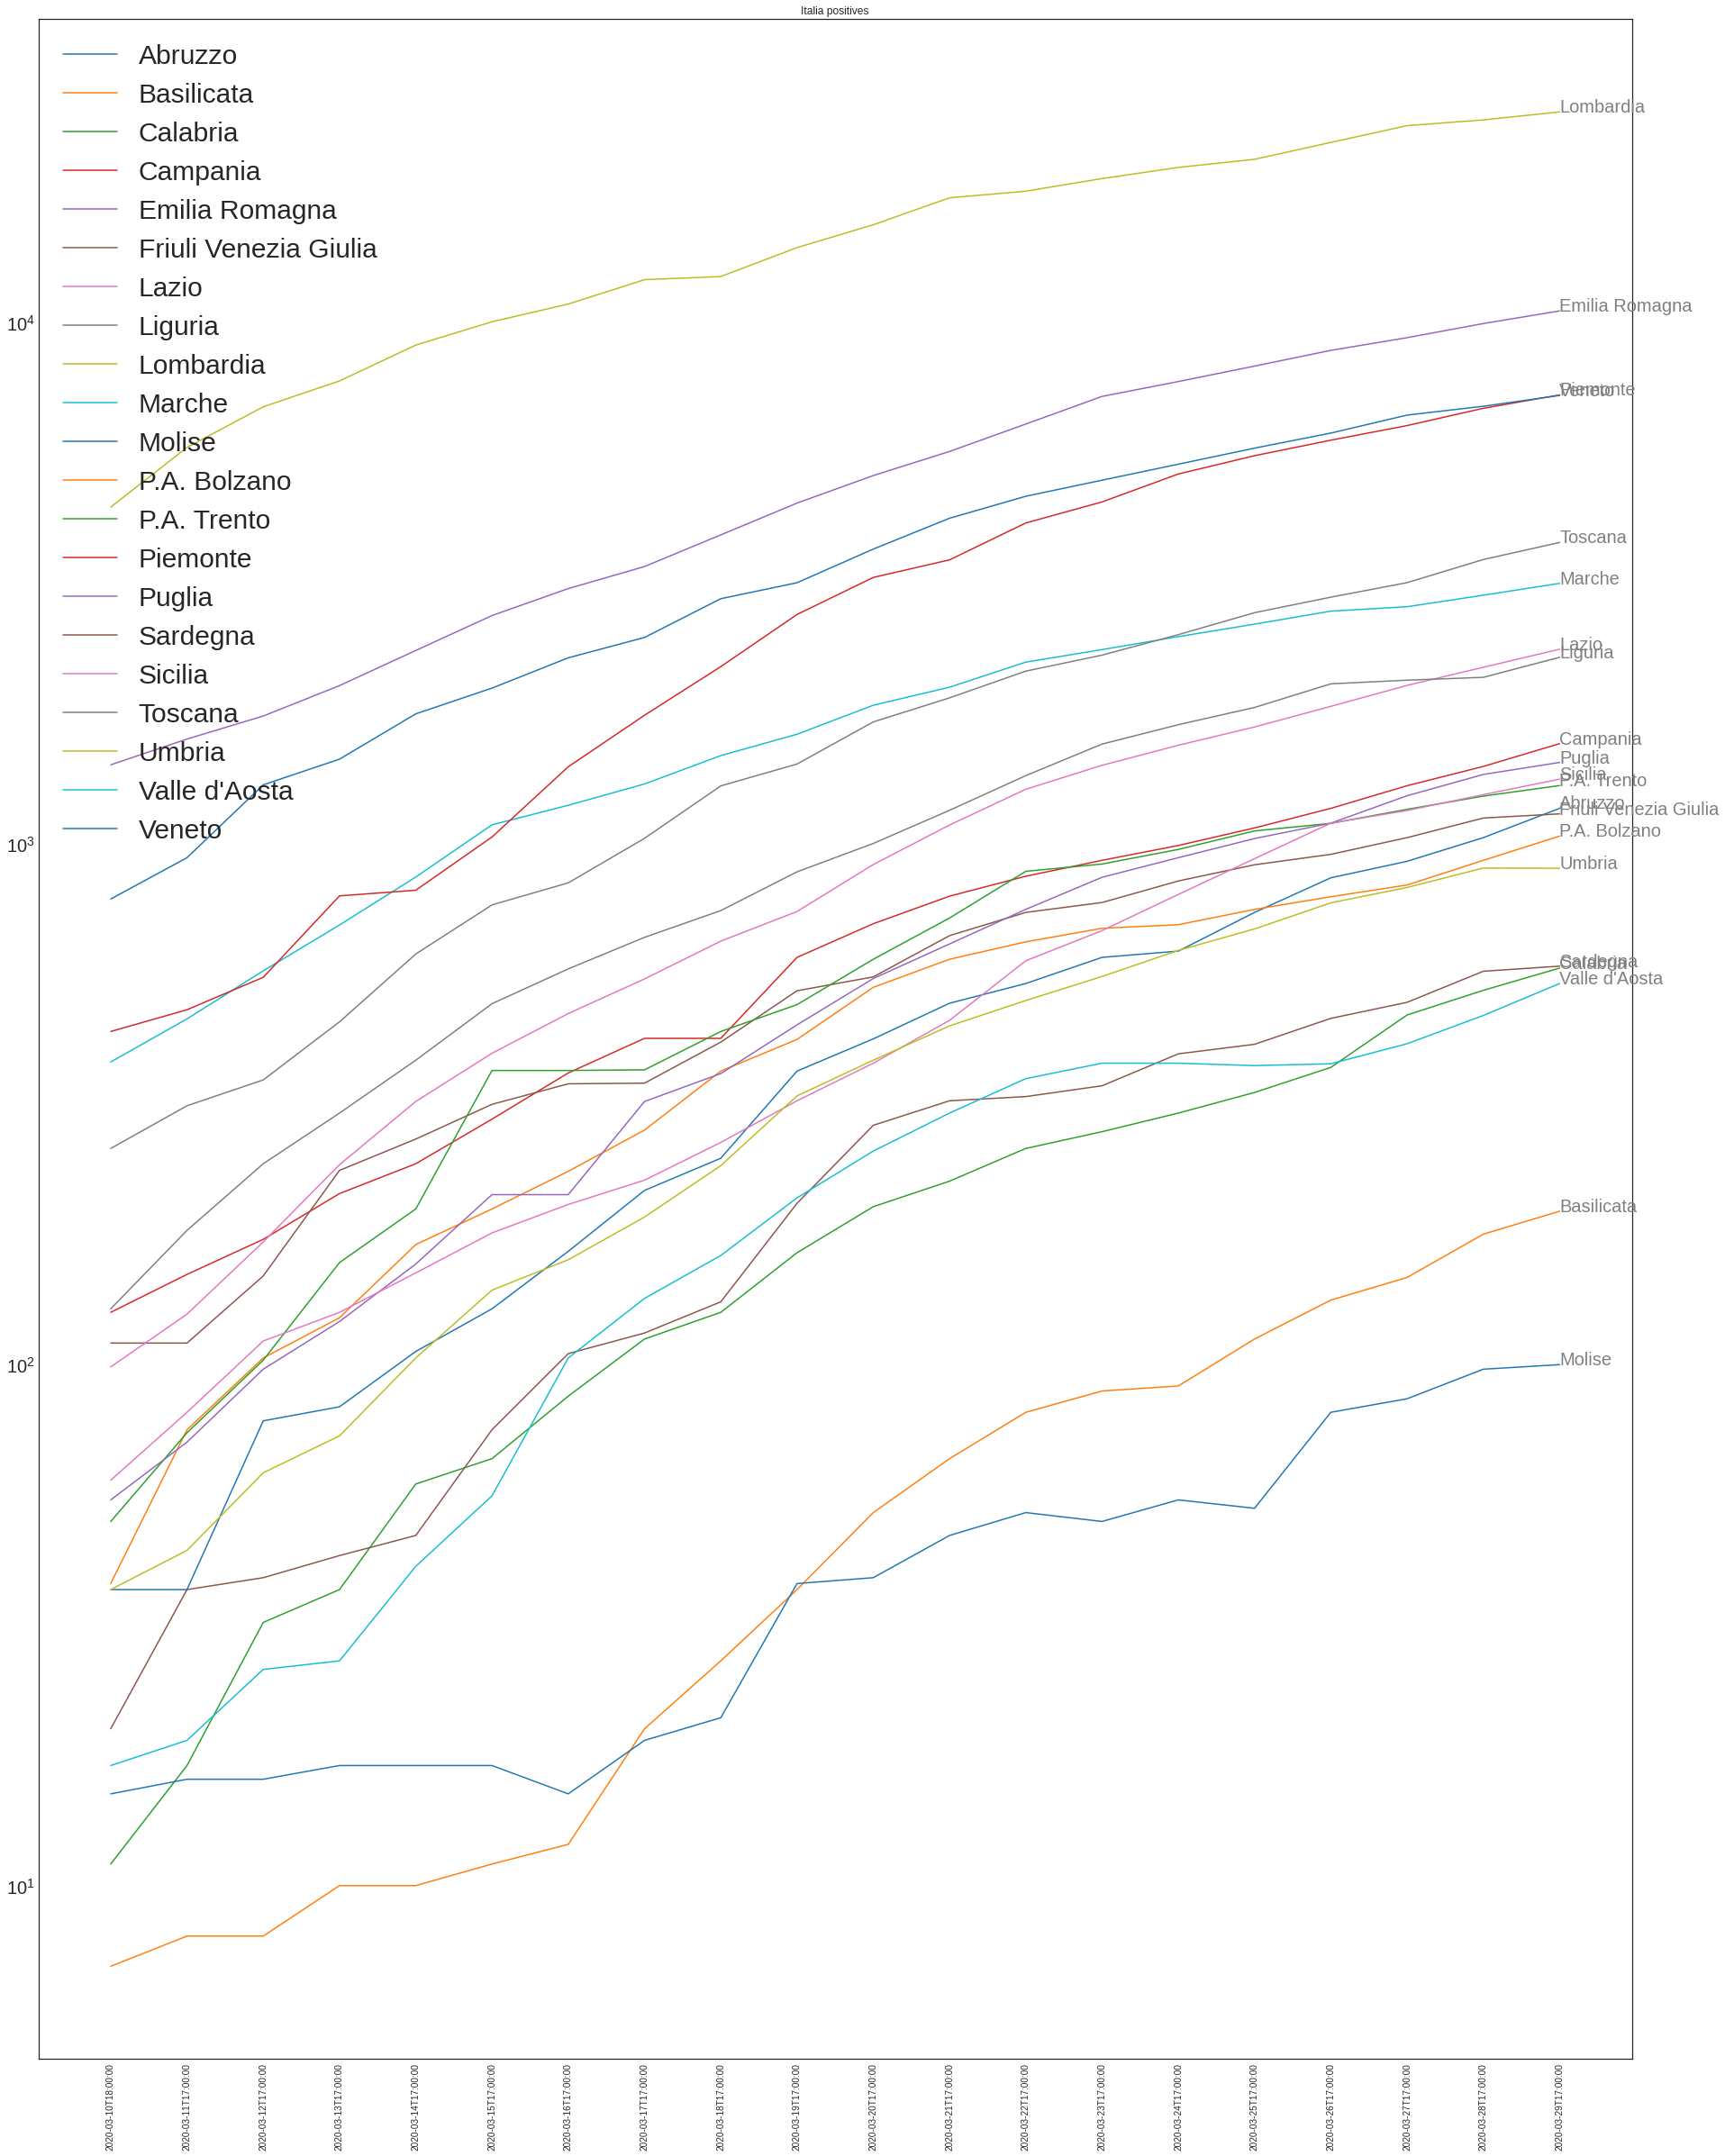

In [37]:
style = dict(size=20, color='gray')
columns = list(italy_dead)
last_day = covid['date'].max()
f = plt.figure(figsize=(65,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
i = 0
for region in columns: 
    if (region != 'Italia'):
        region_positive = italy_currently_positive[[region]]
        region_positive = region_positive[15:]
        region_positive.columns = ['Positive']
        ax.plot(region_positive.index, region_positive['Positive'], label=region)
        ax.text(19, region_positive.loc[last_day, 'Positive'], region, **style)
        i=i+1

ax.set_title(region + ' positives')
ax.set_xticklabels(region_positive.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
#ax.set_yticklabels(fontsize='small')
ax.set_yscale('log')
#ax.set_yticks(fontsize=15)
plt.legend(loc="upper left", prop={'size': 30})


Segue una comparazione tra regioni relativa al numero di deceduti

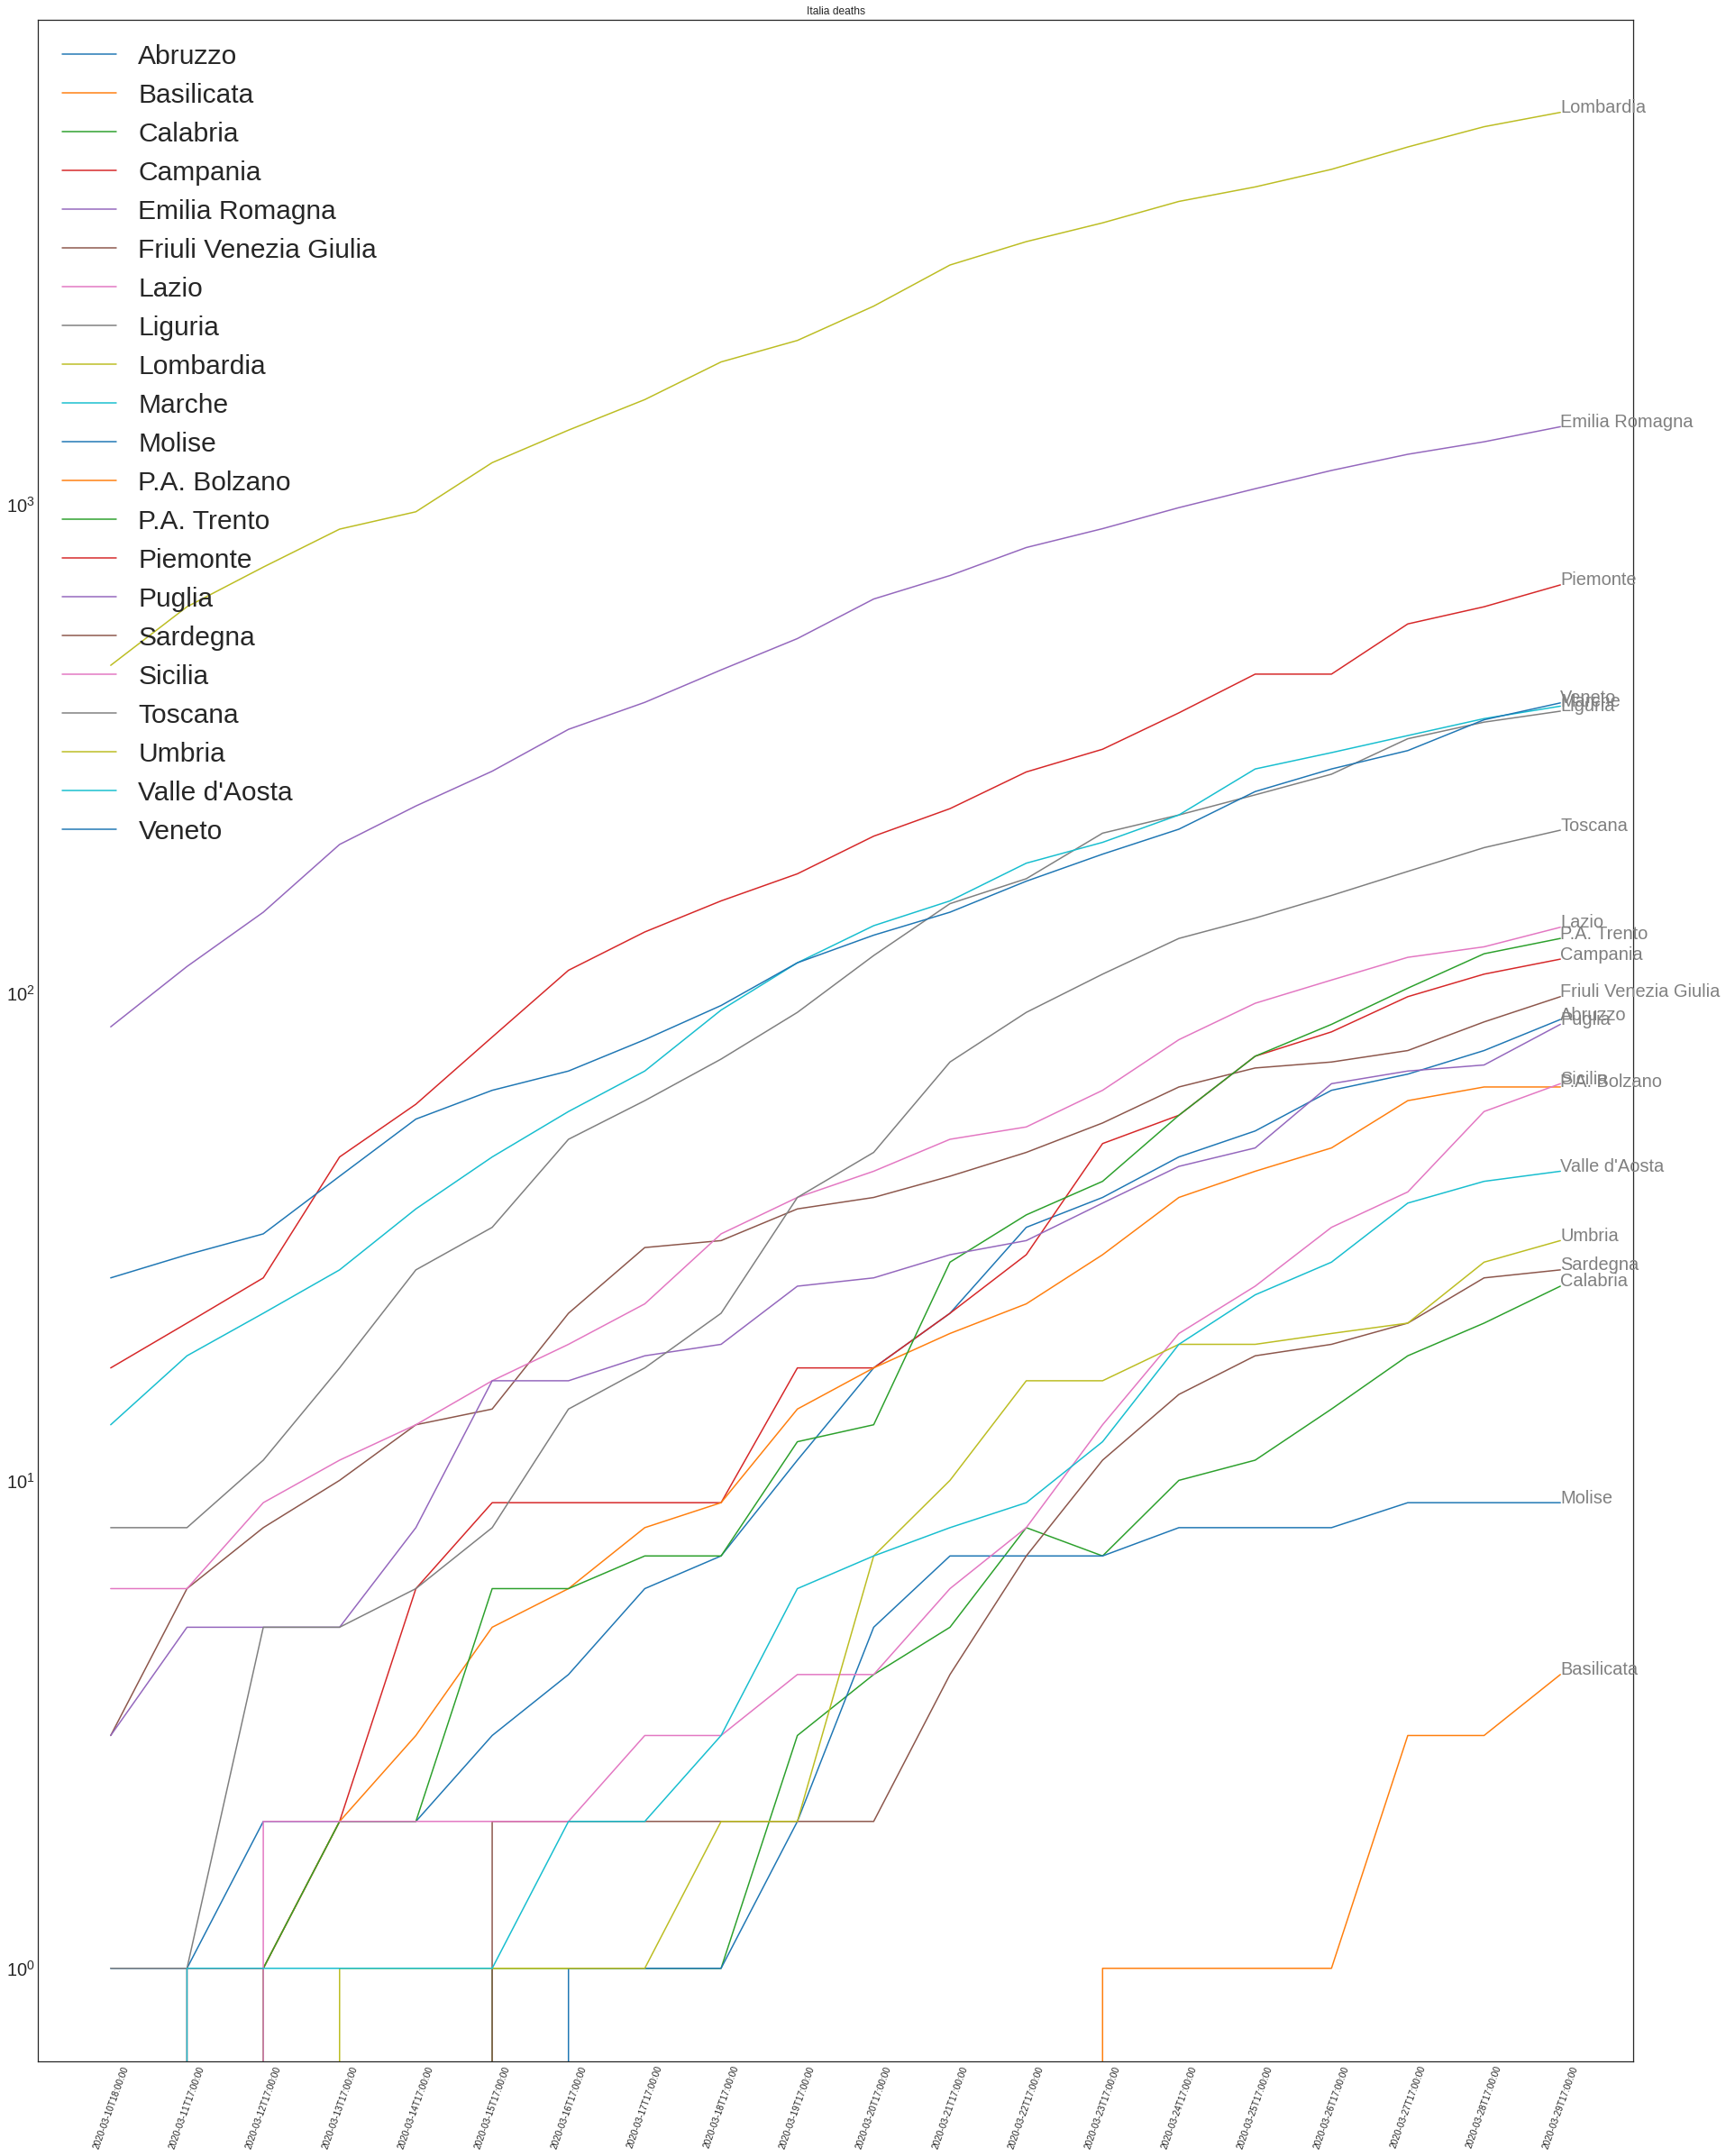

In [40]:
style = dict(size=20, color='gray')
columns = list(italy_dead)
last_day = covid['date'].max()
f = plt.figure(figsize=(65,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
i = 0
for region in columns: 
    if (region != 'Italia'):
        region_dead = italy_dead[[region]]
        region_dead = region_dead[15:]
        region_dead.columns = ['Dead']
        ax.plot(region_dead.index, region_dead['Dead'], label=region)
        ax.text(19, region_dead.loc[last_day, 'Dead'], region, **style)
        i=i+1

ax.set_title(region + ' deaths')
ax.set_xticklabels(region_dead.index,rotation=70)
ax.yaxis.set_tick_params(labelsize=20)
#ax.set_yticklabels(fontsize='small')
ax.set_yscale('log')
#ax.set_yticks(fontsize=15)
plt.legend(loc="upper left", prop={'size': 30})


Vediamo l'andamento regione per regione dell'incremento giornaliero del numero dei positivi correnti (media mobile a tre giorni)

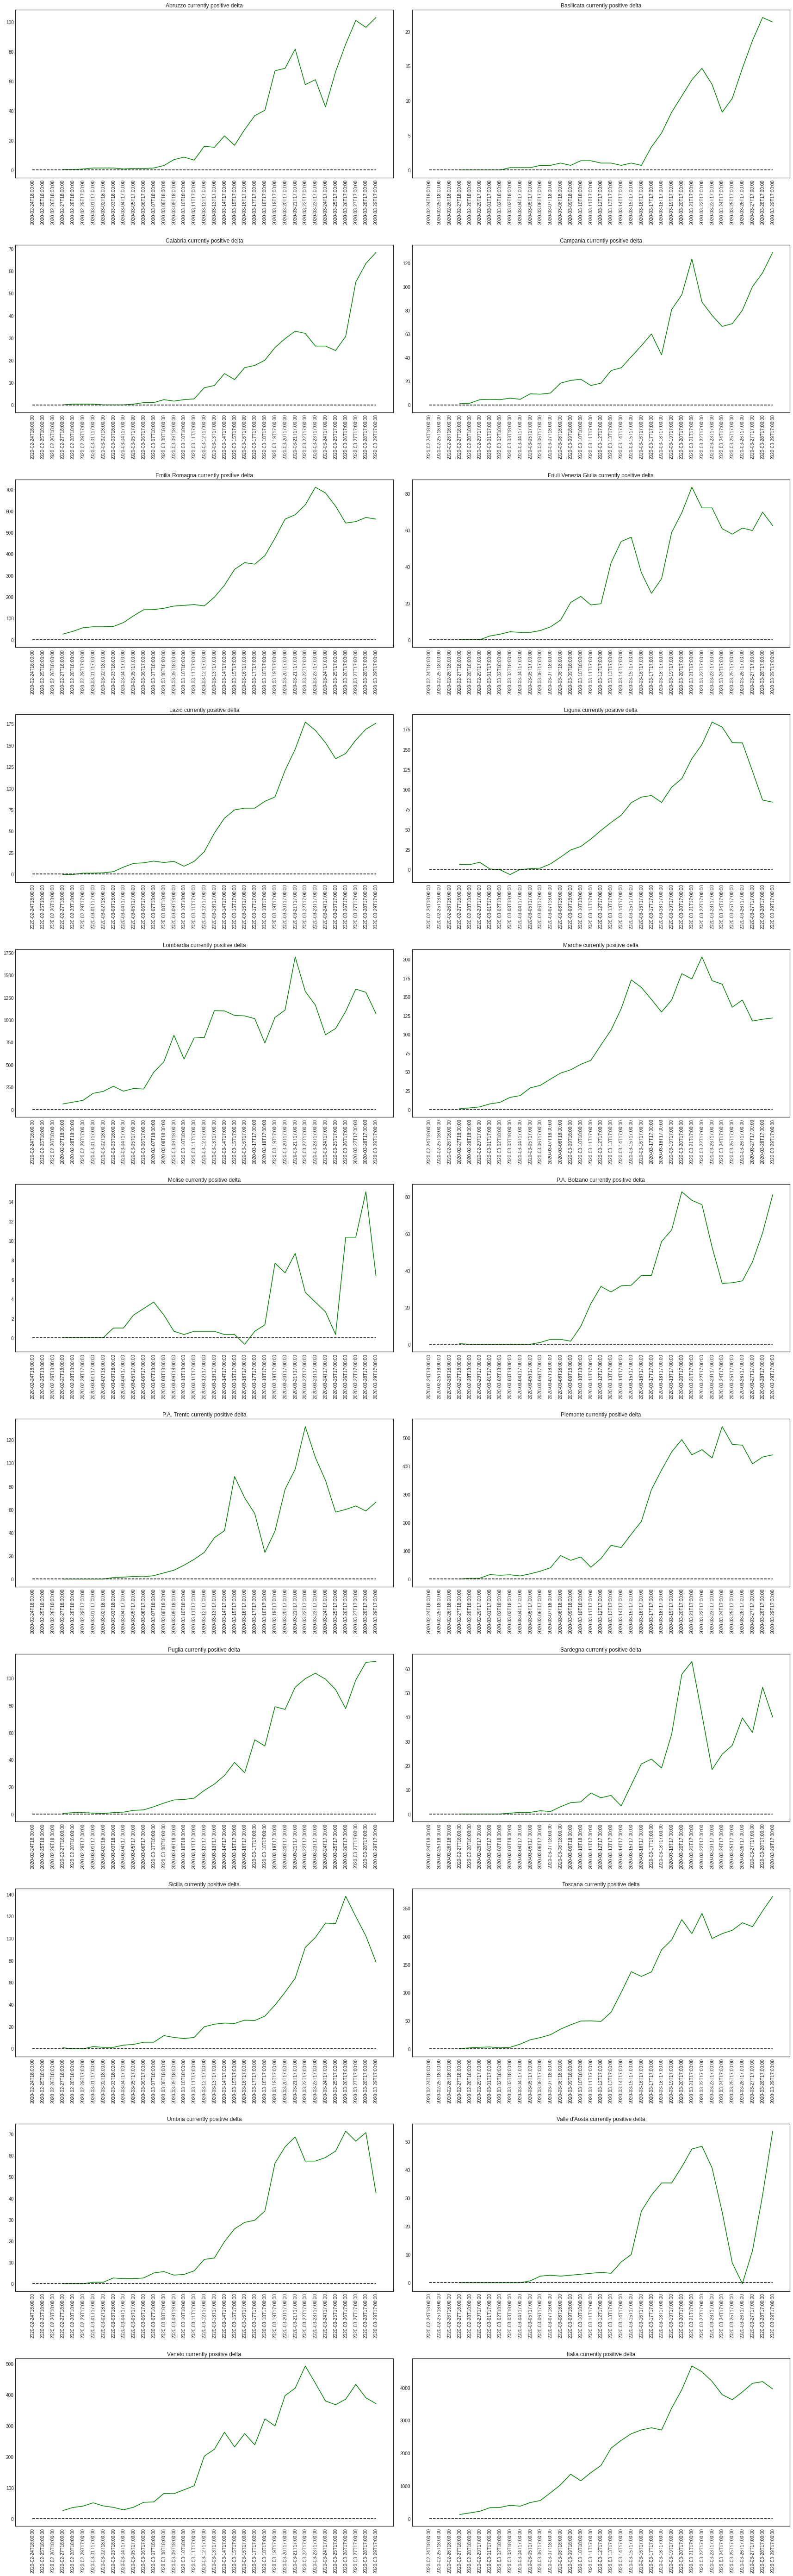

In [53]:
columns = list(italy_currently_positive)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    #fig, ax = plt.subplots(2,3,i,figsize=(10, 5))
    ax = f.add_subplot(11, 2, i)
    region_positive = italy_currently_positive[[region]]
    region_positive.columns = ['Positive']
    ax.plot(region_positive.index, region_positive['Positive'].rolling(window=3).mean().diff(), '-g')
    ax.plot(region_positive.index, np.zeros(region_positive.index.size), '--k')
    ax.set_title(region + ' currently positive delta')
    ax.set_xticklabels(region_positive.index,rotation=90)
    i=i+1


Si ravvisa una velocità media sostenuta in Abruzzo, Calabria, Campania, Lazio, Provincia di Bolzano, Toscana, Puglia, Valle d'Aosta ed una velocità media più bassa in Liguria, Molise, Sicilia, Umbria. Complessivamente in Italia si assiste ad una stabilizzazione della velocità di 4000 nuovi positivi al giorno.
**Il picco si configura nel momento in cui tali grafici toccheranno lo zero senza più aumentare**.
A livello regionale la Liguria sembra la regione più vicina al picco (una seeimana?) ma il caso della Val d'Aosta e di altre regioni insegna che si può avere un drastico calo dei nuovi contagi per poi assistere ad una ripresa anche violenta.

Vediamo le derivate seconde dei positivi per capire se sono in corso accelerazioni dei contagi, il che si deduce da un valore superiore a 0

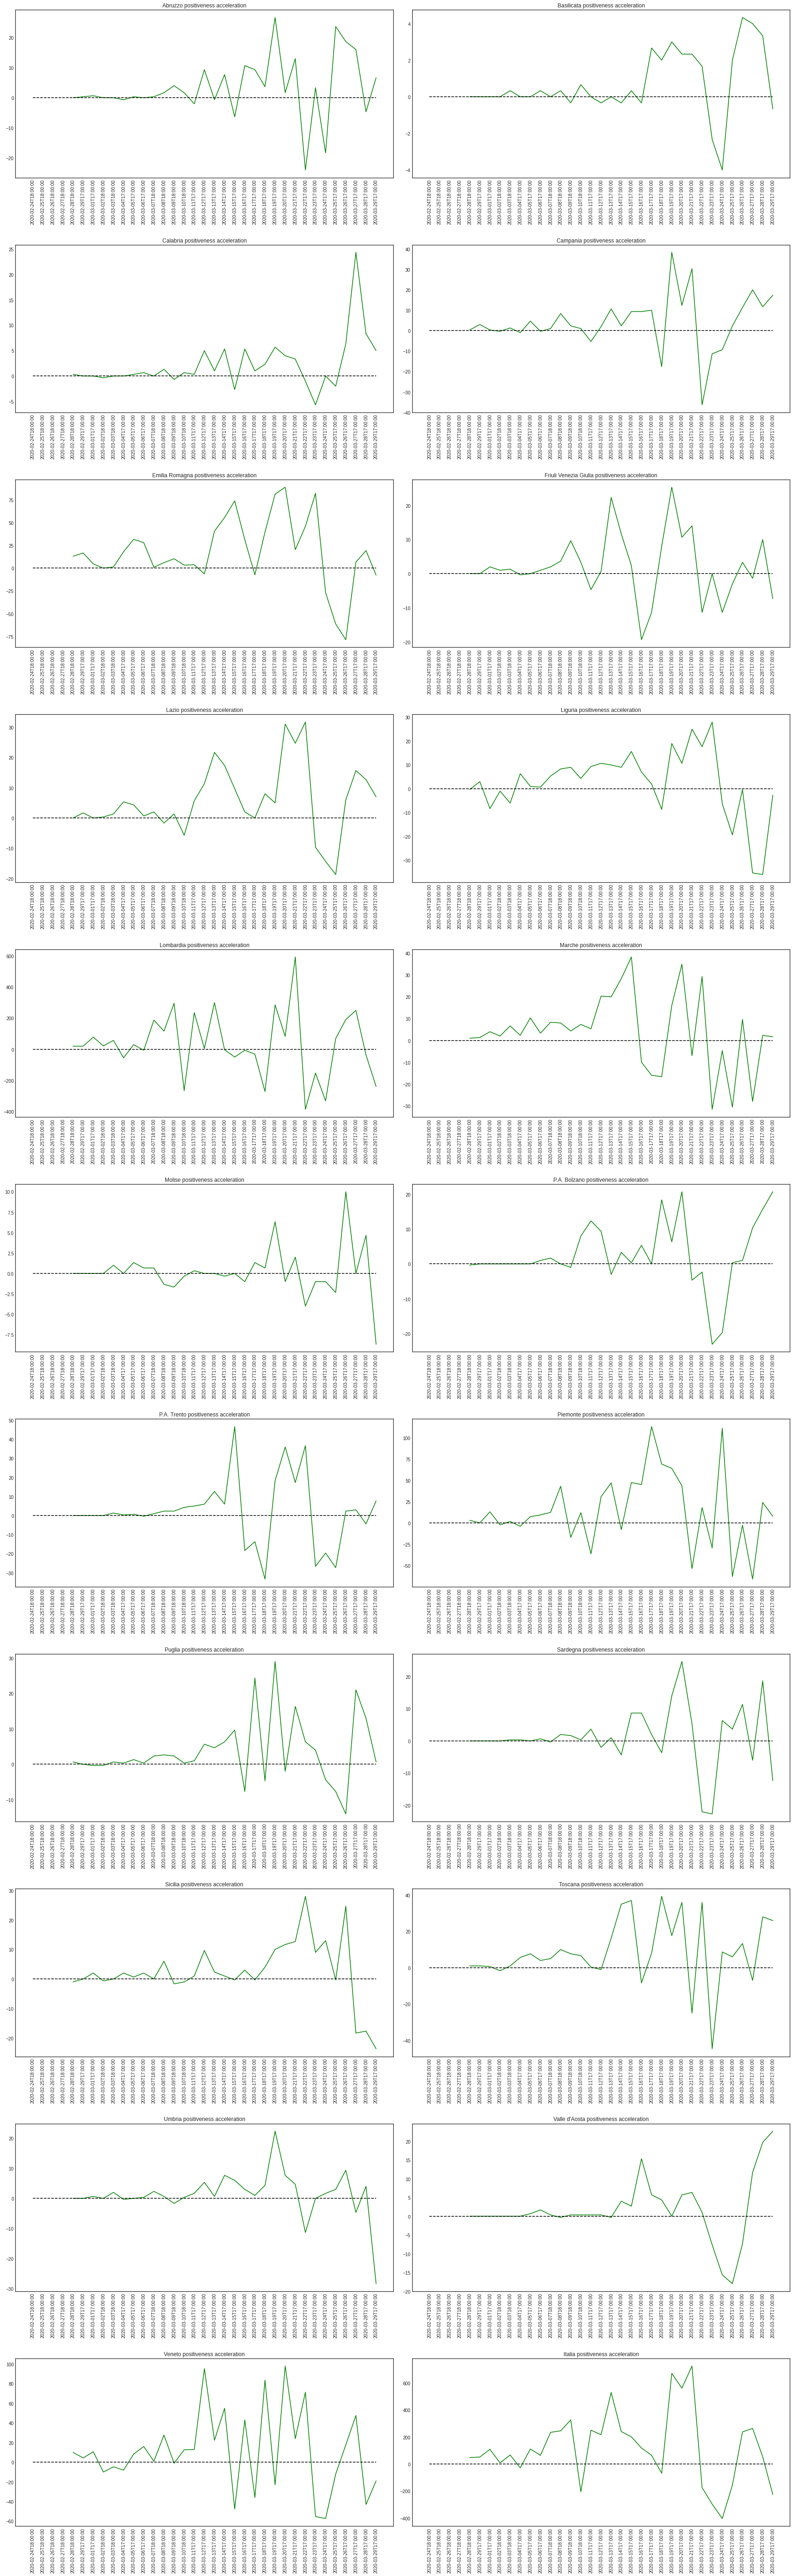

In [54]:
columns = list(italy_dead)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    #fig, ax = plt.subplots(2,3,i,figsize=(10, 5))
    ax = f.add_subplot(11, 2, i)
    region_positive = italy_currently_positive[[region]]
    region_positive.columns = ['Positive']
    #ax.plot(region_positive.index, region_positive['Positive'].diff(), '--r')
    ax.plot(region_positive.index, region_positive['Positive'].rolling(window=3).mean().diff().diff(), '-g')
    ax.plot(region_positive.index, np.zeros(region_positive.index.size), '--k')
    ax.set_title(region + ' positiveness acceleration')
    ax.set_xticklabels(region_positive.index,rotation=90)
    i=i+1


Da un'analisi qualitativa emerge un'accelerazione dei contagi in Abruzzo, Calabria, Campania, Provincia di Bolzano, Toscana, Valle d'Aosta ma questa accelerazione viene compensata dalla decelerazione di Friuli Venezia Giulia, Lombardia, Molise, Sardegna, Sicilia, Umbria. la Calabria potrebbe prepararsi ad una nuova impennata Le altre regioni e l'Italia in generale oscillano intorno ad una velocità costante con una tendenza alla decelerazione che speriamo venga confermata dall'andamento dei prossimi giorni.

Nella seguente grafica si cambia prospettiva e viene rappresentata l'istantanea del rapporto tra deceduti e totali positivi su tutte le regioni, giorno per giorno, con media mobile a 3 giorni


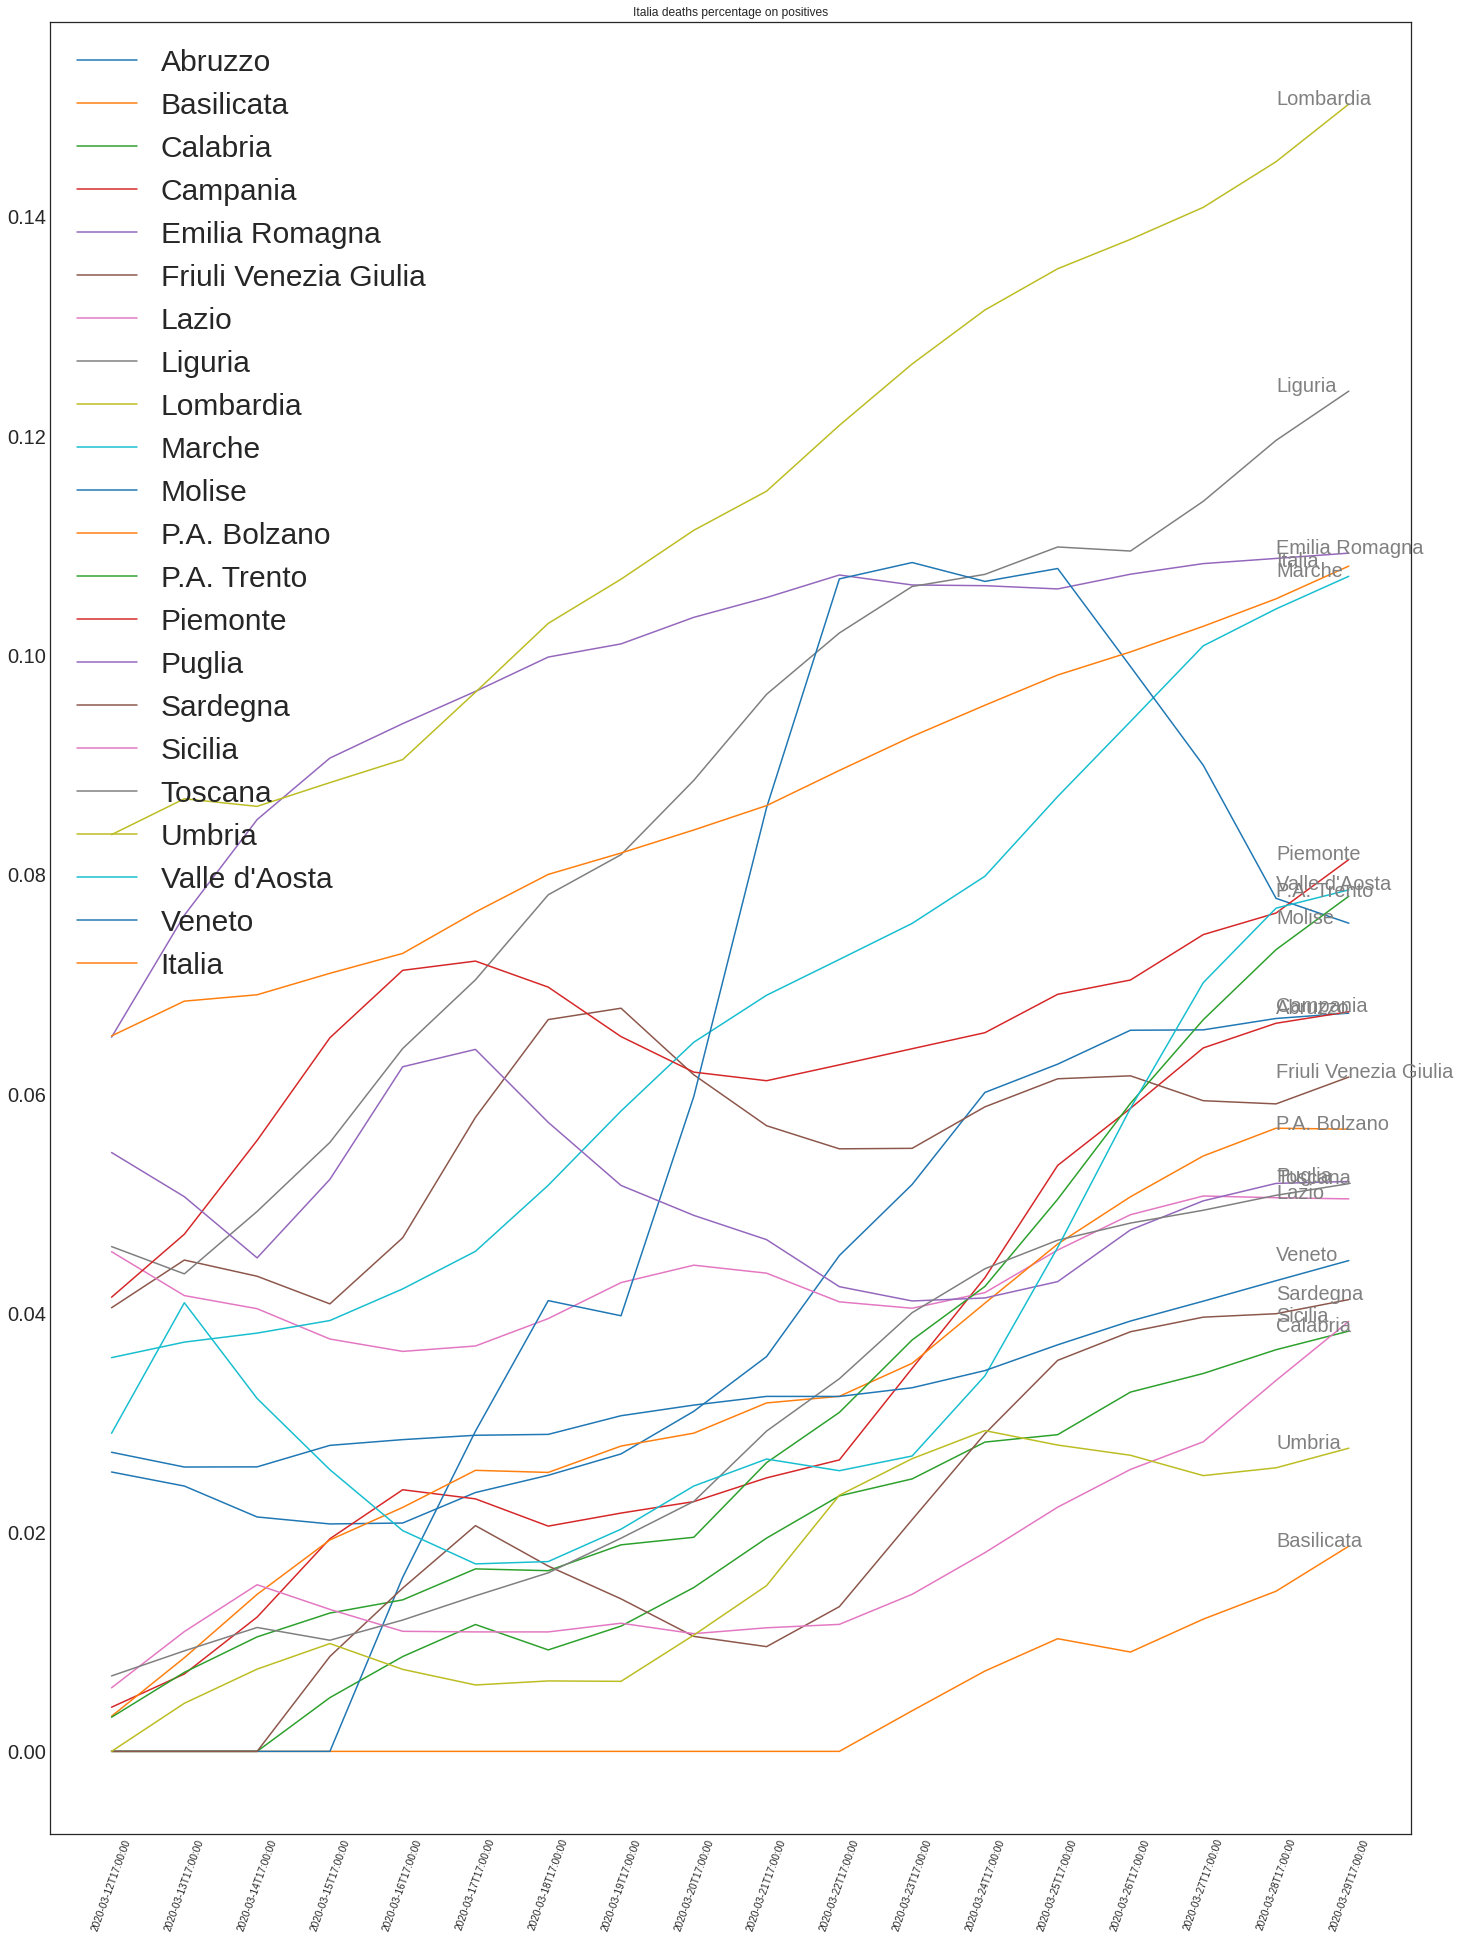

In [45]:
italy_dead_vs_total = italy_dead/italy_total_positive
style = dict(size=20, color='gray')
columns = list(italy_dead_vs_total)
last_day = covid['date'].max()
f = plt.figure(figsize=(50,80))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
i = 0
for region in columns: 
    region_dead = italy_dead_vs_total[[region]]
    region_dead = region_dead[15:]
    region_dead.columns = ['Dead_percentage']
    ax.plot(region_dead.index, region_dead['Dead_percentage'].rolling(window=3).mean(), label=region)
    ax.text(18, region_dead.rolling(window=3).mean().loc[last_day, 'Dead_percentage'], region, **style)
    i=i+1

ax.set_title(region + ' deaths percentage on positives')
ax.set_xticklabels(region_dead.index,rotation=70)
ax.yaxis.set_tick_params(labelsize=20)
#ax.set_yticklabels(fontsize='small')
ax.set_yscale('linear')
#ax.set_yticks(fontsize=15)
plt.legend(loc="upper left", prop={'size': 30})


E' la Lombardia a soffrire il più alto tasso di deceduti rispetto ai positivi, seguita a poca distanza dalla Liguria, quindi da Emilia Romagna e Marche che rappresentano la media nazionale. 


Il fenomeno è particolarmente in ascesa nella provincia di Trento e Valle d'Aosta ma anche Liguria, Lombardia, Marche



**Adesso si ripropongono più o meno le stesse analisi ma con i dati normalizzati in base alla popolazione**

In [0]:
#source: https://www.tuttitalia.it/regioni/
population_density = pd.DataFrame([
              {'denominazione_regione': 'Abruzzo', 'density': 121, 'population': 1311580}, 
              {'denominazione_regione': 'Basilicata', 'density': 56, 'population': 562869}, 
              {'denominazione_regione': 'Calabria', 'density': 128, 'population': 1947131}, 
              {'denominazione_regione': 'Campania', 'density': 424, 'population': 5801692}, 
              {'denominazione_regione': 'Emilia Romagna', 'density': 199, 'population': 4459477}, 
              {'denominazione_regione': 'Friuli Venezia Giulia', 'density': 153, 'population': 1215220}, 
              {'denominazione_regione': 'Lazio', 'density': 341, 'population': 5879082}, 
              {'denominazione_regione': 'Liguria', 'density': 286, 'population': 1550640}, 
              {'denominazione_regione': 'Lombardia', 'density': 422, 'population': 10060574}, 
              {'denominazione_regione': 'Marche', 'density': 162, 'population': 1525271}, 
              {'denominazione_regione': 'Molise', 'density': 69, 'population': 305617}, 
              {'denominazione_regione': 'P.A. Bolzano', 'density': 79, 'population': 536137}, 
              {'denominazione_regione': 'P.A. Trento', 'density': 79, 'population': 536137}, 
              {'denominazione_regione': 'Piemonte', 'density': 172, 'population': 4356406}, 
              {'denominazione_regione': 'Puglia', 'density': 206, 'population': 4029053}, 
              {'denominazione_regione': 'Sardegna', 'density': 68, 'population': 1639591}, 
              {'denominazione_regione': 'Sicilia', 'density': 194, 'population': 4999891}, 
              {'denominazione_regione': 'Toscana', 'density': 162, 'population': 3729641}, 
              {'denominazione_regione': 'Umbria', 'density': 104, 'population': 882015}, 
              {'denominazione_regione': 'Valle d\'Aosta', 'density': 39, 'population': 125666}, 
              {'denominazione_regione': 'Veneto', 'density': 267, 'population': 4905854}, 
            ]) 


Cerchiamo di capire se c'è una correlazione tra densità abitativa e numero di contagiati totale in base all'ultima rilevazione

In [0]:
last_day = covid['date'].max()
italy_total_positive_last_day = italy_total_positive[italy_total_positive.index == last_day]
italy_total_positive_last_day_flat = italy_total_positive_last_day.stack().reset_index(name='positive')[['denominazione_regione', 'positive']]
mergedf = pd.merge(italy_total_positive_last_day_flat, population_density)

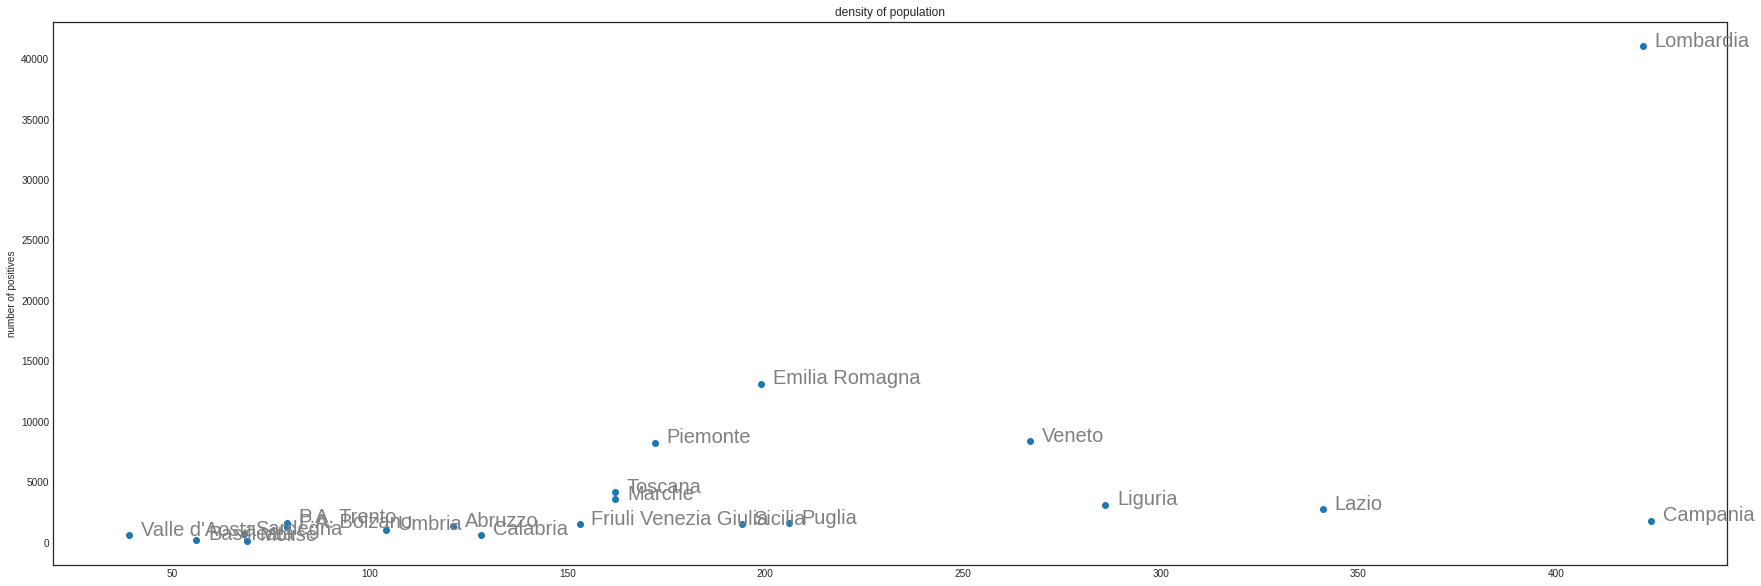

In [48]:
fig, ax = plt.subplots(figsize=(30, 10))
plt.scatter(mergedf['density'], mergedf['positive'])
style = dict(size=20, color='gray')
for i in range(21):
    ax.text(mergedf.loc[i, 'density']+3, mergedf.loc[i, 'positive'], mergedf.loc[i, 'denominazione_regione'], **style)
ax.set(title='density of population', ylabel='number of positives')
plt.show()


Questo plot non fornisce grossi spunti a prima vista. Di sicuro basse densità abitative sembrano essere correlate a basse percentuali di positività. Meno chiaro è ciò che avviene a densità medie ed alte dove si vedono risultati discordanti. Bisogna però tenere conto che in quest'area le regioni a basso numero di positivi sono, a parte la Liguria, regioni del centro-sud dove l'epidemia è arrivata in ritardo rispetto al nord, il che se da una parte può preludere ad una salita, dall'altra sconta il lockdown già nelle fasi iniziali

In [0]:
tempdf = pd.DataFrame([{'denominazione_regione': 'Italia', 'population': population_density['population'].sum()}])
population = population_density[['denominazione_regione', 'population']]
population = population.append(tempdf, ignore_index = True)
population_pivot = population.pivot_table('population', columns='denominazione_regione')

Normalizziamo i dati sul numero di positivi in base alla popolazione di ciascuna regione, ottenendo quindi la percentuale di abitanti positivi di ogni regione

In [0]:
italy_total_positive_normalized = italy_total_positive.copy()
columns = list(italy_total_positive_normalized)
for regione in columns: 
    italy_total_positive_normalized[regione] = italy_total_positive[regione]/population_pivot.loc['population', regione]


Visualizziamo quindi la percentuale di positivi (dato lordo, quindi comprensivo di deceduti e guariti) di tutte le regioni sul totale delle loro popolazioni, giorno per giorno

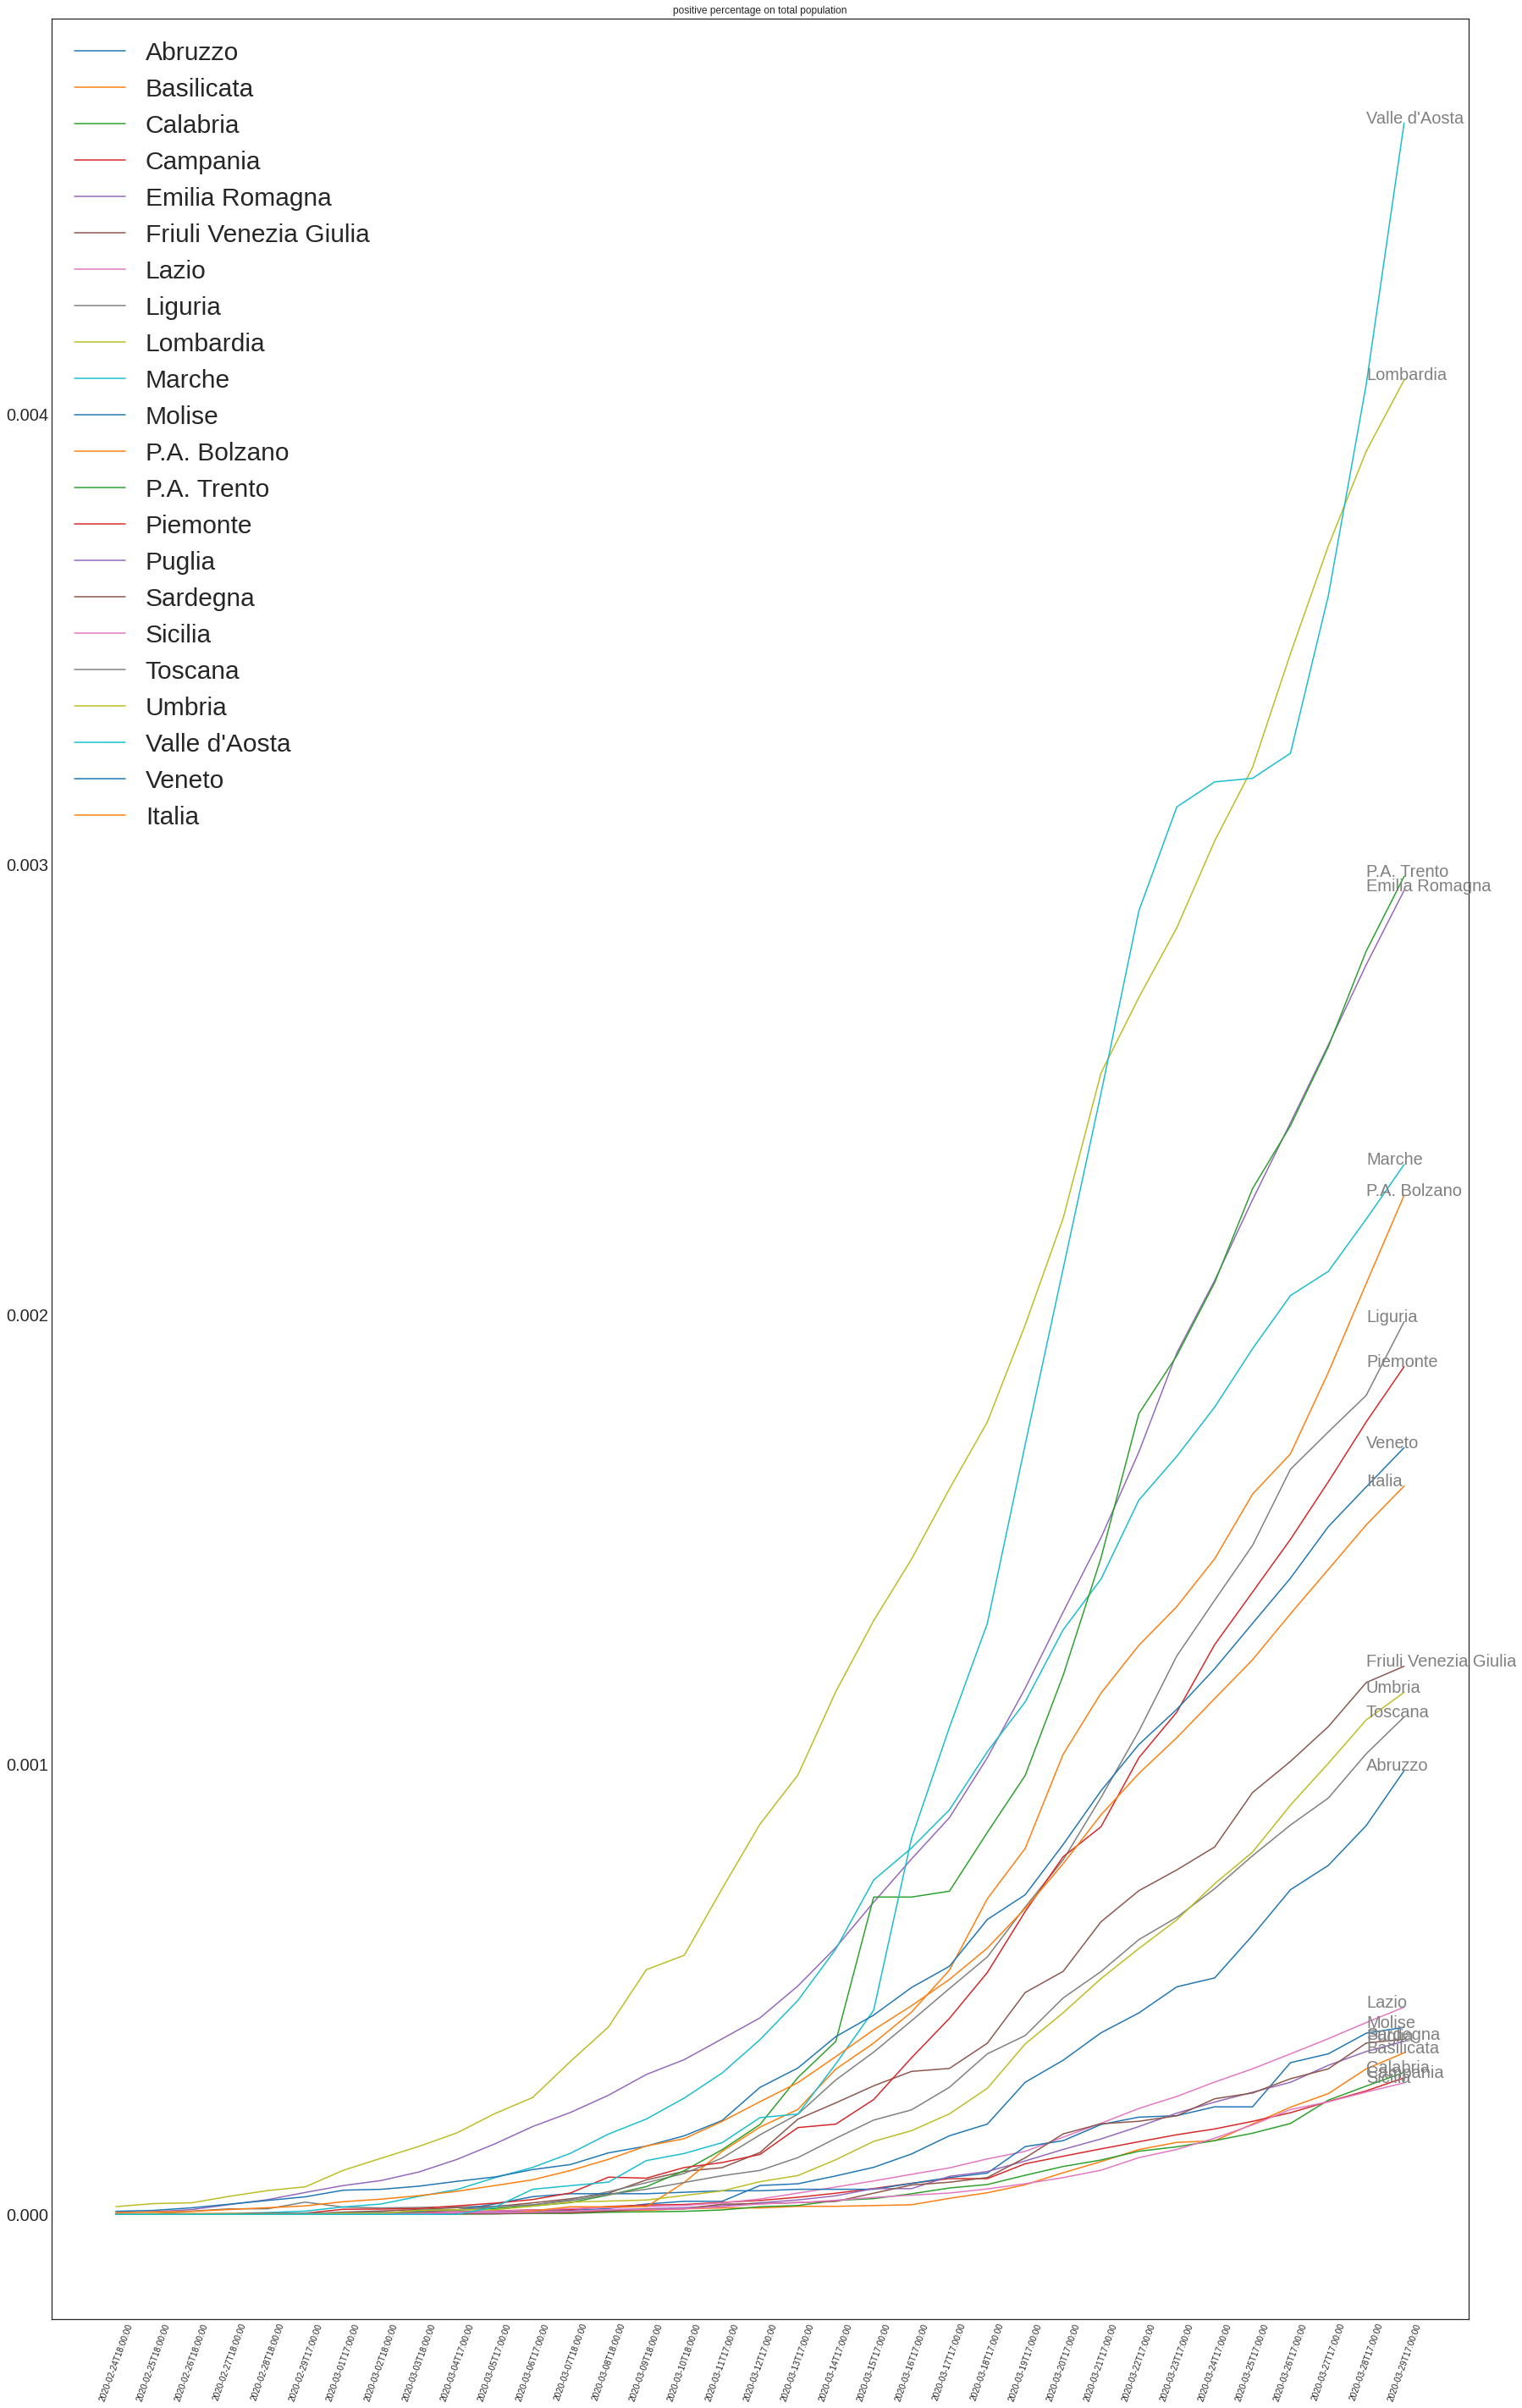

In [51]:
style = dict(size=20, color='gray')
columns = list(italy_total_positive_normalized)
last_day = covid['date'].max()
f = plt.figure(figsize=(30,50))
ax = f.add_subplot(1, 1, 1)
for region in columns: 
    region_tpn = italy_total_positive_normalized[[region]]
    #region_tpn = region_tpn[15:]
    region_tpn.columns = ['Positive_percentage']
    ax.plot(region_tpn.index, region_tpn['Positive_percentage'], label=region)
    ax.text(33, region_tpn.loc[last_day, 'Positive_percentage'], region, **style)

ax.set_title('positive percentage on total population')
ax.set_xticklabels(italy_total_positive_normalized.index,rotation=70)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})




Sopra la media nazionale Valle d'Aosta, Lombardia, Emilia Romagna, Trentino Alto Adige e Marche. Al 28/3 la Valle d'Aosta e Lombardia superano il tasso di positività del 4 per mille.

Infine la correlazione tra densità abitativa e percentuale di positivi totali riferita all'ultima rilevazione

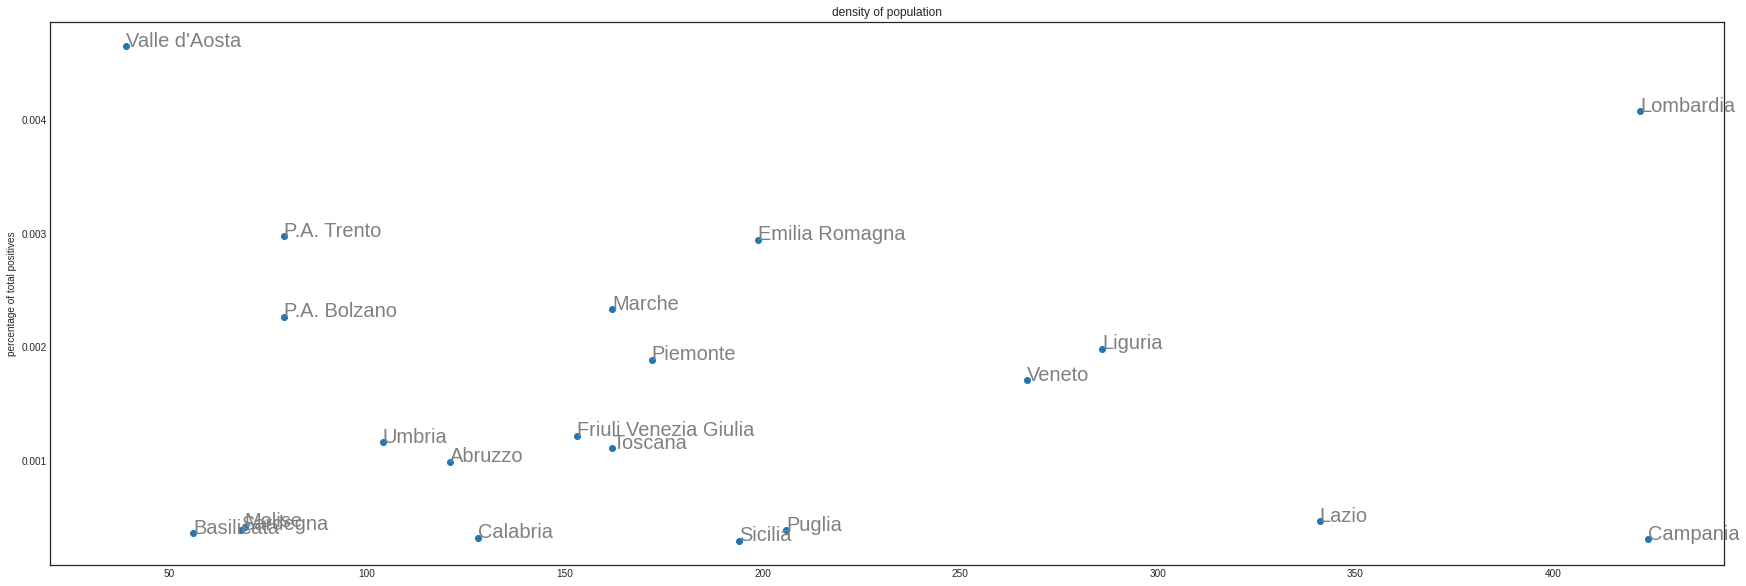

In [52]:
last_day = italy_total_positive_normalized.index[-1]
for day in italy_total_positive_normalized.index: 
    italy_total_positive_normalized_last_day = italy_total_positive_normalized[italy_total_positive_normalized.index == last_day]
italy_total_positive_normalized_last_day_flat = italy_total_positive_normalized_last_day.stack().reset_index(name='positive')[['denominazione_regione', 'positive']]
mergedf = pd.merge(italy_total_positive_normalized_last_day_flat, population_density)
fig, ax = plt.subplots(figsize=(30, 10))
plt.scatter(mergedf['density'], mergedf['positive'])
style = dict(size=20, color='gray')
for i in range(21):
    ax.text(mergedf.loc[i, 'density'], mergedf.loc[i, 'positive'], mergedf.loc[i, 'denominazione_regione'], **style)
ax.set(title='density of population', ylabel='percentage of total positives')
plt.show()


Questo plot non chiarisce nulla sull'eventuale correlazione tra le due grandezze ma sconta la differente maturità dell'epidemia da regione a regione, sul fondo infatti si trovano tutte le regioni del centro-sud che ad occhio hanno un ritardo di circa una settimana rispetto alle regioni del nord e che pertanto beneficiano maggiormente delle misure di prevenzione adottate in corso d\'opera.

Mentre la curva dei totali positivi (quindi comprensiva di guariti e deceduti) avrà un andamento sigmoidale, ossia tipo questo:


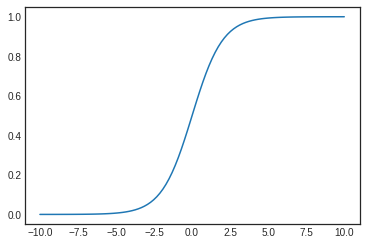

In [0]:
x = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-x))
plt.plot(x, y)
plt.show()

... quella degli attualmente positivi potrebbe raggiungere un picco, quindi scendere ed infine tendere a zero, forse con una discesa più lenta rispetto alla salita, più o meno come il seguente modello: 

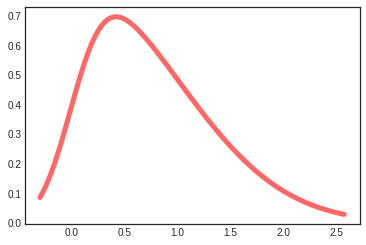

In [0]:
from scipy.stats import skewnorm
fig, ax = plt.subplots(1, 1)
a = 4
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a), 'r-', lw=5, alpha=0.6, label='skewnorm pdf')

In ogni caso ciò che interessa maggiormente ai fini predittivi è la data e l'intensità del picco degli attualmente positivi. Se fosse possibile stimare queste due quantità il Sistema Sanitario Regionale potrebbe organizzarsi.

Il modello più "antico" a disposizione è quello lombardo ma bisogna tenere conto che per molti giorni non ha beneficiato delle misure restrittive di cui invece godono i focolai più recenti, quindi le previsioni, al di là della loro correttezza, sono da intendersi come pessimistiche. Il picco effettivo dovrebbe essere più basso e più lontano nel tempo rispetto a quello previsto, secondo quanto descritto in questo [studio](https://www.visualcapitalist.com/infection-trajectory-flattening-the-covid19-curve/?fbclid=IwAR3KsS0FJgZPdCwoj0uw7qNO5bagm59eKdg85C12Wjw3T0w8mODXaX9iU8g)

Per rendere confrontabili i modelli delle singole regioni dobbiamo renderci indipendenti dalle loro caratteristiche intrinseche (dimensioni e numero di abitanti, in particolare) per cui non possiamo fare affidamento sul numero di positivi assoluto. Utilizziamo quindi le variazioni percentuali rispetto al giorno precedente, ossia la differenza tra il numero degli attualmente positivi del giorno considerato ed il precedente, diviso per il numero degli attualmente positivi del giorno precedente.

**Il picco si configurerà nel momento in cui le barre tenderanno allo zero o inizieranno ad andare sotto zero**

In [0]:
italy_currently_positive_delta = (italy_currently_positive - italy_currently_positive.shift(periods=1))/italy_currently_positive.shift(periods=1)
italy_currently_positive_delta = italy_currently_positive_delta.replace(np.inf, np.nan)
italy_currently_positive_delta = italy_currently_positive_delta.fillna(0)
italy_currently_positive_delta = italy_currently_positive_delta.loc['2020-03-01T17:00:00':]
italy_currently_positive_delta = italy_currently_positive_delta[italy_currently_positive_delta<1]
italy_currently_positive_delta = italy_currently_positive_delta.fillna(0)


Un altro spunto interessante potrebbe provenire dal rapporto tra numero di positivi totali e numero di tamponi effettuati, anche se i tamponi non sono stati effettuati in maniera casuale ma solo a chi presentava sintomi riconducibili al Coronavirus

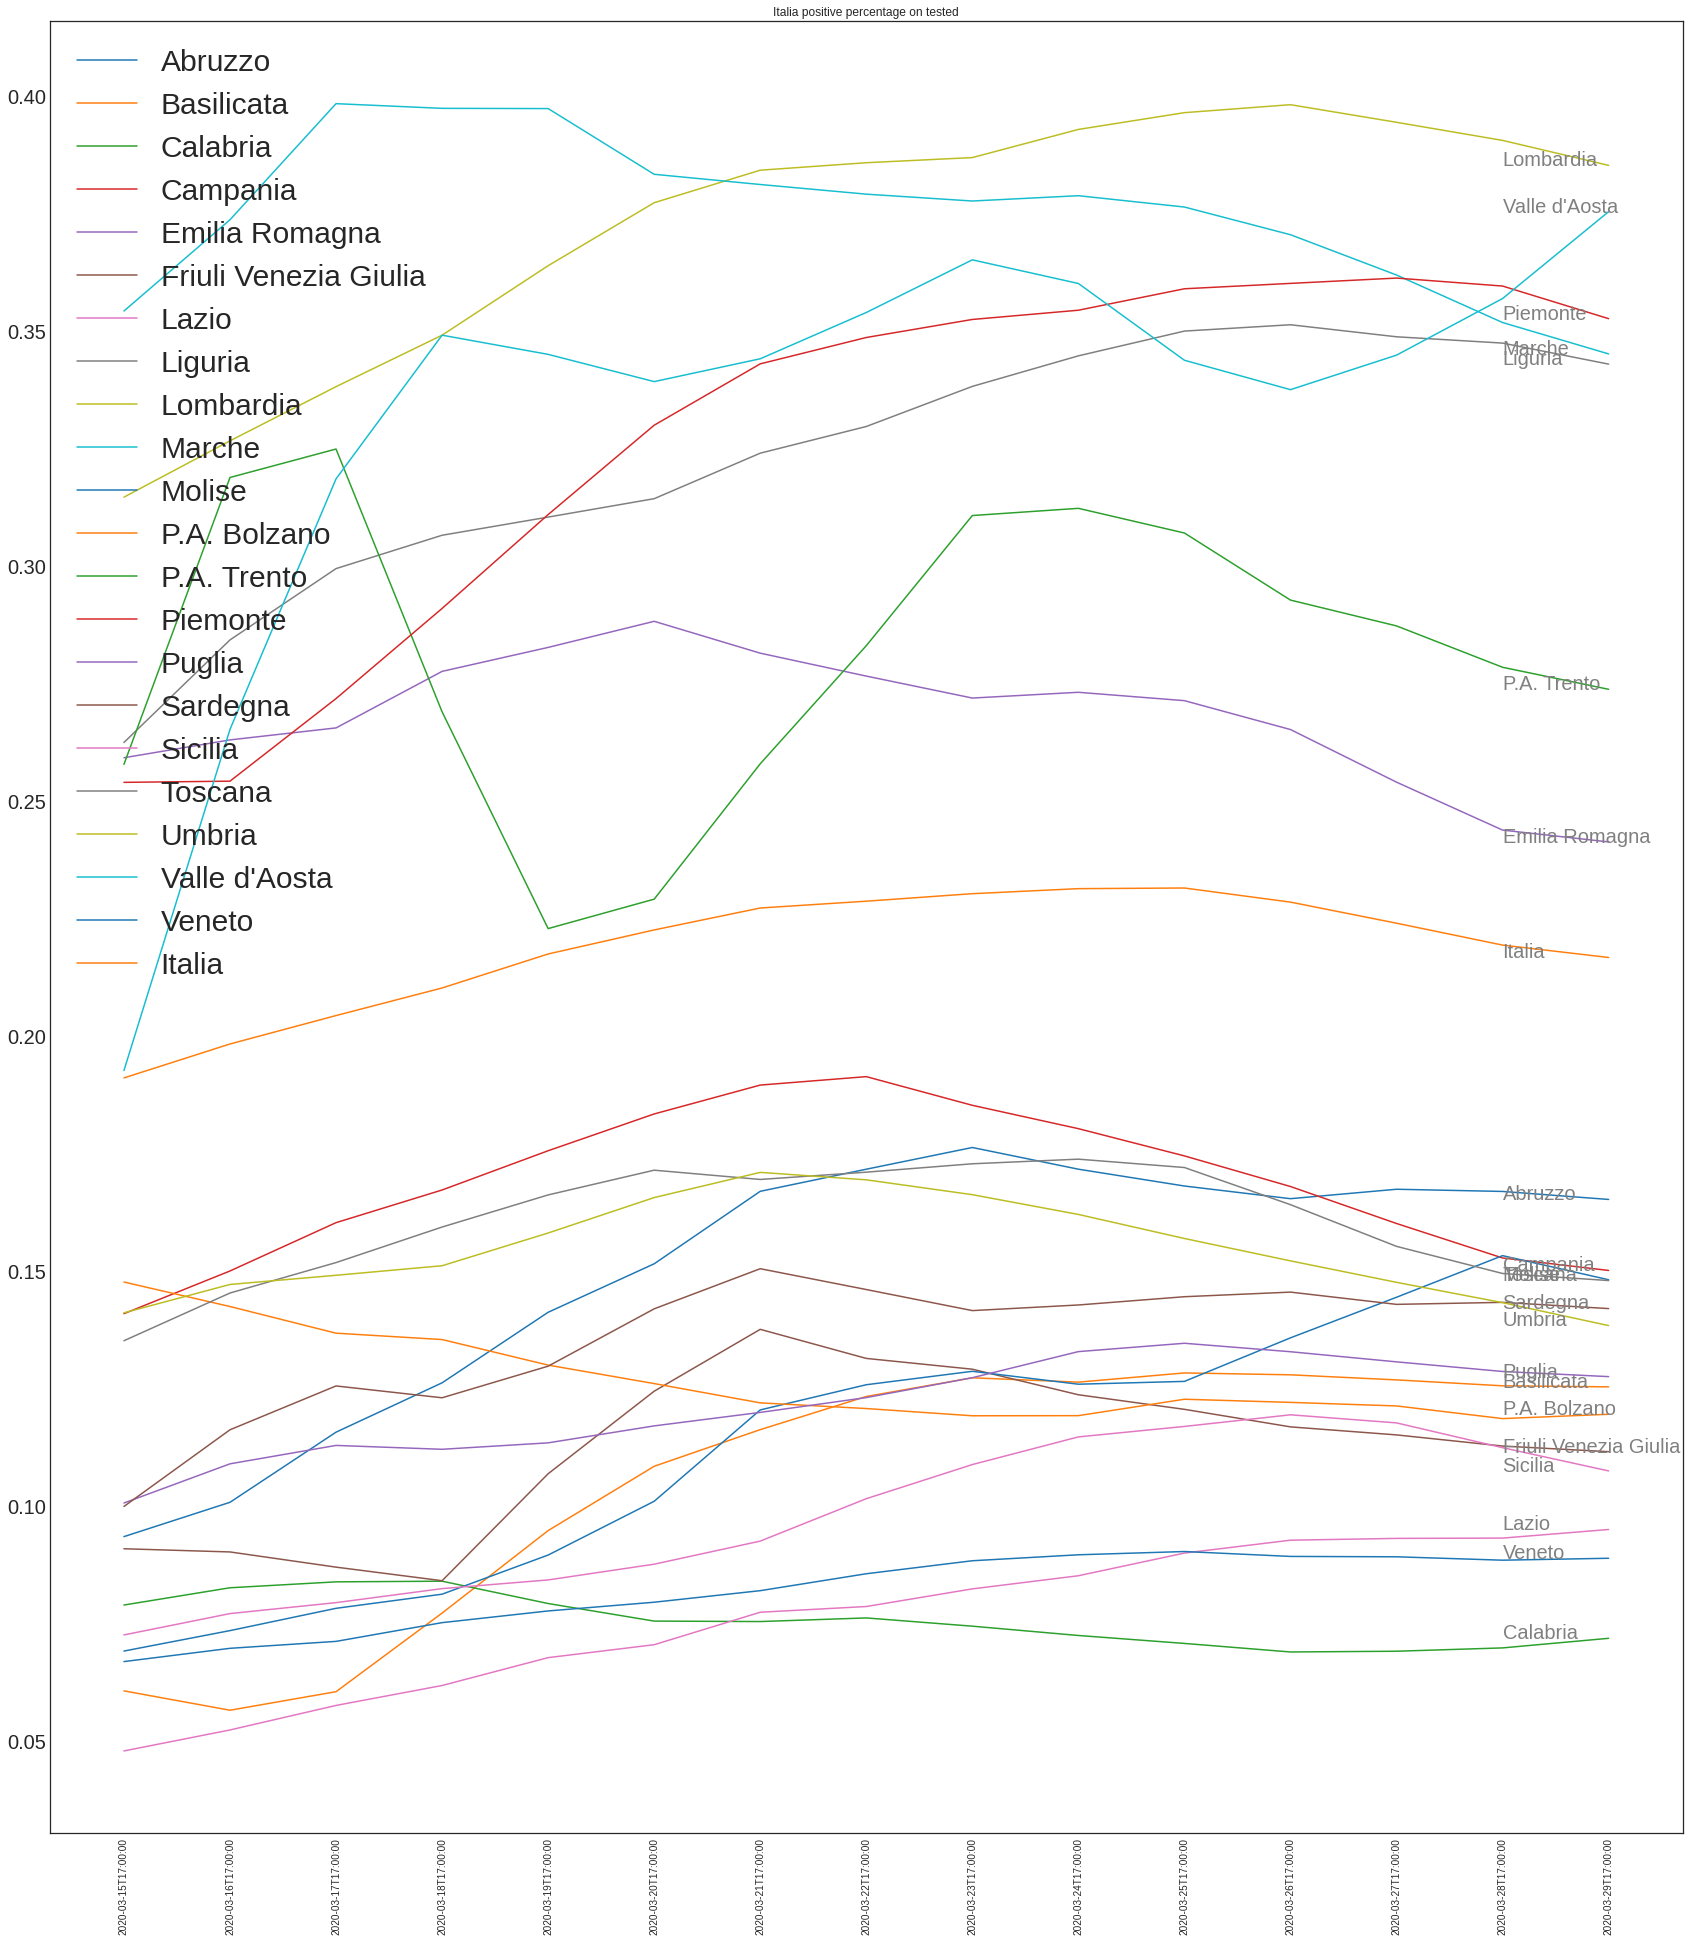

In [57]:
style = dict(size=20, color='gray')
columns = list(italy_tested)
last_day = covid['date'].max()
f = plt.figure(figsize=(60,80))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
for region in columns: 
    region_positive_vs_tested = italy_total_positive[[region]]/italy_tested[[region]]
    region_positive_vs_tested = region_positive_vs_tested[18:]
    #region_positive_vs_tested.columns = ['Positive']
    ax.plot(region_positive_vs_tested.index, region_positive_vs_tested.rolling(window=3).mean(), label=region)
    ax.text(15, region_positive_vs_tested.rolling(window=3).mean().loc[last_day], region, **style)

ax.set_title(region + ' positive percentage on tested')
ax.set_xticklabels(region_positive_vs_tested.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})

L'esecuzione del tampone è mirata, ossia viene effettuata tendenzialmente a chi presenta sintomi sospetti però è curioso come si passi da percentuali del 10% al 40%... **forse nelle regioni a tasso più alto è anche più alto il numero di infetti nascosti, oppure nelle regioni a più basso tasso l'esecuzione dei tamponi è stata meno mirata?** Nel primo caso sarebbe opportuno partire con tamponi a campione in queste regioni che, tra l'altro, Marche a parte, sono confinanti e nell'ultimo mese sono state oggetto di intensi scambi turistici, ma anche di una storia precedente al lockdown.